In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import plotly.express as px

In [2]:
with open("../db/ready_data.pkl", 'rb') as f:
    df = pickle.load(f)

In [3]:
"""
Для кластеризации были продукты, что не имели в себе каких-либо NaN значений, после
чего были прокластерезированны и разделены а 4 кластера методом KMeans

Названия были заменены на названия компаний издателей, для проведения кластеризации
Цена указанная в таблицы - находится в рублях
Колонка rec_proc - является процентом пользователей, что рекомендовали данный продукт(из тех людей
что купили продукт)
ОЗУ И ПЗУ находятся в гигабайтах и в продуктах был взят именно минимальный размер памяти
для того или иного телефона.
Батарея находится в значениях мА\ч
Камера находится в мегапикселях

Дополнительно к характеристикам, что были указаны в ТЗ были добавлены:
ОС, ОЗУ, ПЗУ, Диагональ, Камера.
Все это было выбранно как важные параметры характеристик телефона, что сказываются на стоимость
телефона, выбор потенциальных клиентов, а значит и прибыли различных кампаний.

"""

'\nДля кластеризации были продукты, что не имели в себе каких-либо NaN значений, после\nчего были прокластерезированны и разделены а 4 кластера методом KMeans\n\nНазвания были заменены на названия компаний издателей, для проведения кластеризации\nЦена указанная в таблицы - находится в рублях\nКолонка rec_proc - является процентом пользователей, что рекомендовали данный продукт(из тех людей\nчто купили продукт)\nОЗУ И ПЗУ находятся в гигабайтах и в продуктах был взят именно минимальный размер памяти\nдля того или иного телефона.\nБатарея находится в значениях мА\\ч\nКамера находится в мегапикселях\n\nДополнительно к характеристикам, что были указаны в ТЗ были добавлены:\nОС, ОЗУ, ПЗУ, Диагональ, Камера.\nВсе это было выбранно как важные параметры характеристик телефона, что сказываются на стоимость\nтелефона, выбор потенциальных клиентов, а значит и прибыли различных кампаний.\n\n'

In [4]:
df.head(30)

,name,price,stars,review_num,OS,RAM,ROM,diag,bat
0,Unihertz,64286,3.9,8,Android 13,18,512,6.79,23800
1,Motorola,54229,5.0,1,Android 12,12,256,6.70,4610
2,Motorola,54229,5.0,1,Android 12,12,256,6.70,4610
3,Blackview,51662,5.0,1,Android 14,24,512,6.78,8800
4,8849,50018,4.8,2,Android 13,16,512,6.79,23800
5,Ulefone,37062,5.0,1,Android 13,24,512,6.78,5280
6,Blackview,38965,5.0,5,Android 13,12,512,6.78,8800
7,Lenovo,32643,4.7,2,Android 12,8,128,6.67,5100
9,Unihertz,27790,5.0,4,Android 12,12,256,6.81,22000
10,Ulefone,27667,4.8,5,Android 13,24,256,6.78,22000


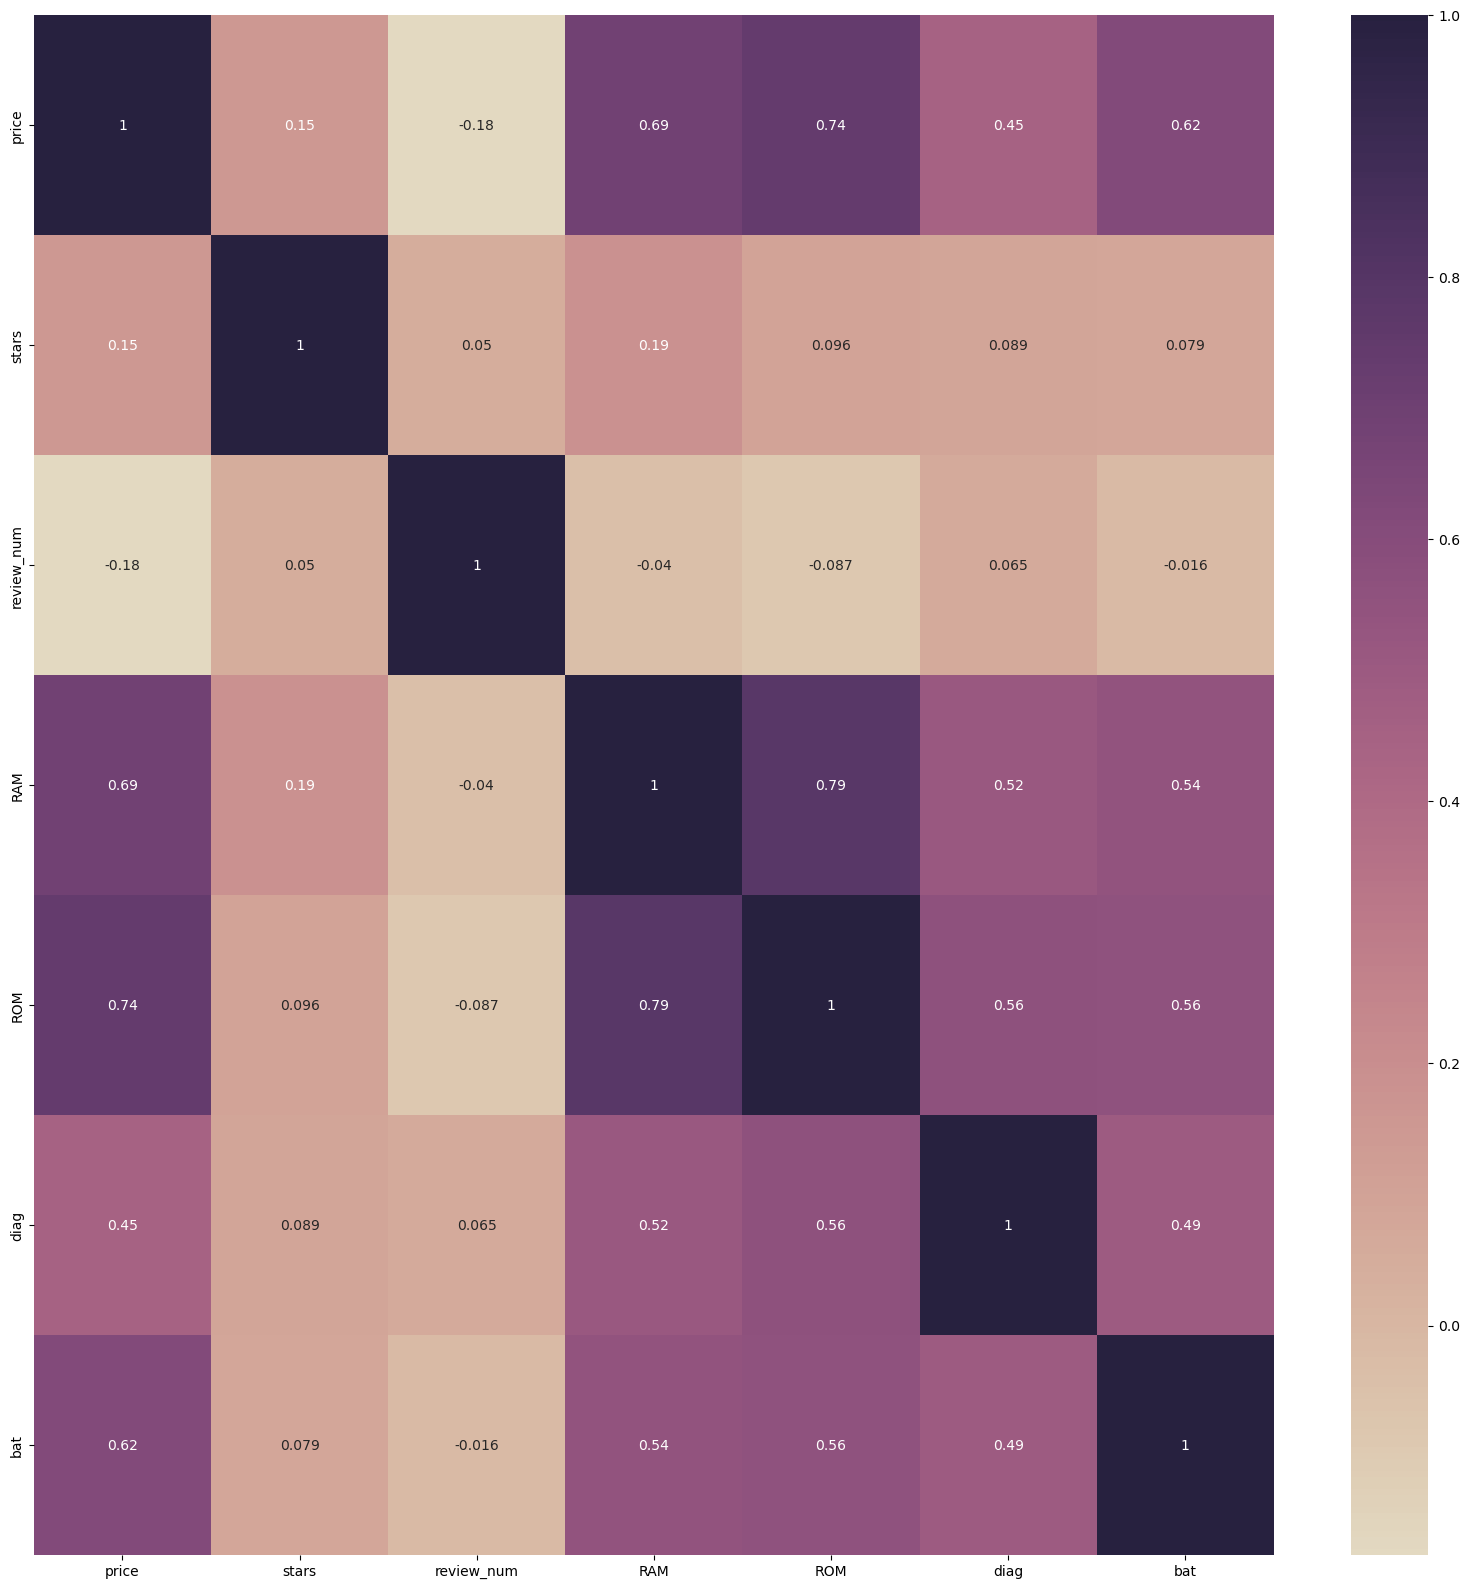

In [5]:
plt.figure(figsize=(20,20))
col_cat = df.select_dtypes(exclude=['object']).columns.tolist()
corr = df[col_cat].corr()
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [6]:
"""

Как можно увидеть из графика корреляций - наиболее влияют на продажи - количество обзоров
Имеется зависимость между количеством ПЗУ и ОЗУ в телефоне
Диагональ и камера - значительно сказываются на стоимости телефона
Количество звезд телефона в общем - сказывается на стоимости, скорее всего из-за того, вокруг
некоторых продуктов образуется некоторый культ, что восхваляет некоторые продукты.


"""

'\n\nКак можно увидеть из графика корреляций - наиболее влияют на продажи - количество обзоров\nИмеется зависимость между количеством ПЗУ и ОЗУ в телефоне\nДиагональ и камера - значительно сказываются на стоимости телефона\nКоличество звезд телефона в общем - сказывается на стоимости, скорее всего из-за того, вокруг\nнекоторых продуктов образуется некоторый культ, что восхваляет некоторые продукты.\n\n\n'

In [7]:
"""
После проведения кластеризации в полученных продуктах были выделены 3 группы:
Телефоны средней категории(телефоны что не имеют завышенных цен и имеют среднее железо)
Телефоны дешёвой категории(телефоны, что имеют низкие цены и имеют хорошее железо)
Телефоны завышенной цены(телефоны, что имеют большую цену, однако не имеют железа, что оправдывает её)
"""

'\nПосле проведения кластеризации в полученных продуктах были выделены 3 группы:\nТелефоны средней категории(телефоны что не имеют завышенных цен и имеют среднее железо)\nТелефоны дешёвой категории(телефоны, что имеют низкие цены и имеют хорошее железо)\nТелефоны завышенной цены(телефоны, что имеют большую цену, однако не имеют железа, что оправдывает её)\n'

In [8]:
companies = df['name'].unique()

In [9]:
#Функция для перебора продуктов по ценам и кампаниям
def show_difference_in_price_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов от данной кампании:")
        print("{}: {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='review_num', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов от данной кампании:
Unihertz: 2
Количество Телефонов от данной кампании:
Motorola: 2
Количество Телефонов от данной кампании:
Blackview: 14
Количество Телефонов от данной кампании:
8849: 2
Количество Телефонов от данной кампании:
Ulefone: 7
Количество Телефонов от данной кампании:
Lenovo: 1
Количество Телефонов от данной кампании:
Cubot: 15
Количество Телефонов от данной кампании:
Xiaomi: 10
Количество Телефонов от данной кампании:
Oukitel : 1
Количество Телефонов от данной кампании:
UMIDIGI: 8
Количество Телефонов от данной кампании:
Oscal: 6
Количество Телефонов от данной кампании:
Soyes: 15
Количество Телефонов от данной кампании:
QIN: 1


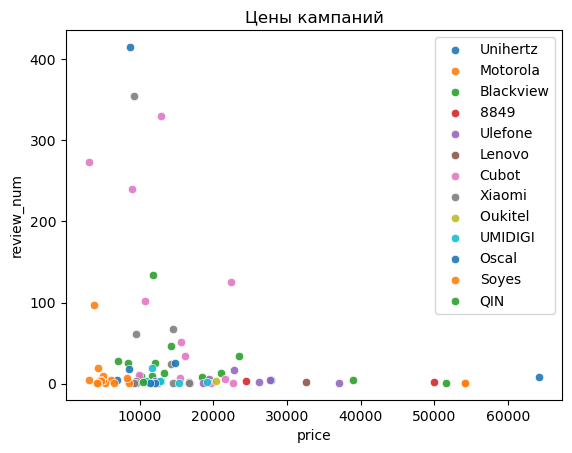

In [10]:
show_difference_in_price_with_companies(df)

In [11]:
"""

Как видно из графиков представленных выше - компания что предоставляет телефоны - разительно
сказывается на цене конечного продукта, что поставляется пользователям.

"""

'\n\nКак видно из графиков представленных выше - компания что предоставляет телефоны - разительно\nсказывается на цене конечного продукта, что поставляется пользователям.\n\n'

In [12]:
"""

Камера разительно не сказывается на стоимости конечного продукта, если не говорить о телефонах
дешёвого сегмента

"""

'\n\nКамера разительно не сказывается на стоимости конечного продукта, если не говорить о телефонах\nдешёвого сегмента\n\n'

In [13]:
"""

Количество отзывов, что оставляют пользователи - крайне сильно сказываются на продажах телефона
в сети джум. Однако тут может быть и взаимосвязь сказываться в том, что потенциальные покупатели
знали о продукте ещё до его приобретения из других источников. Уже из этого можно сделать вывод,
что рекламые кампании, а так-же общее слово людей о продукте - разительно повышает его популяроность,
а в общем итоге - продажи

"""

'\n\nКоличество отзывов, что оставляют пользователи - крайне сильно сказываются на продажах телефона\nв сети джум. Однако тут может быть и взаимосвязь сказываться в том, что потенциальные покупатели\nзнали о продукте ещё до его приобретения из других источников. Уже из этого можно сделать вывод,\nчто рекламые кампании, а так-же общее слово людей о продукте - разительно повышает его популяроность,\nа в общем итоге - продажи\n\n'

In [14]:
#Функция для перебора продуктов по ОЗУ, ценам и кампаниям
def show_difference_in_RAM_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с ОЗУ различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='RAM', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с ОЗУ различных характеристик:
Телефон Unihertz: количество отзывов 2
Количество Телефонов с ОЗУ различных характеристик:
Телефон Motorola: количество отзывов 2
Количество Телефонов с ОЗУ различных характеристик:
Телефон Blackview: количество отзывов 14
Количество Телефонов с ОЗУ различных характеристик:
Телефон 8849: количество отзывов 2
Количество Телефонов с ОЗУ различных характеристик:
Телефон Ulefone: количество отзывов 7
Количество Телефонов с ОЗУ различных характеристик:
Телефон Lenovo: количество отзывов 1
Количество Телефонов с ОЗУ различных характеристик:
Телефон Cubot: количество отзывов 15
Количество Телефонов с ОЗУ различных характеристик:
Телефон Xiaomi: количество отзывов 10
Количество Телефонов с ОЗУ различных характеристик:
Телефон Oukitel : количество отзывов 1
Количество Телефонов с ОЗУ различных характеристик:
Телефон UMIDIGI: количество отзывов 8
Количество Телефонов с ОЗУ различных характеристик:
Телефон Oscal: количество отзывов 6
Количество 

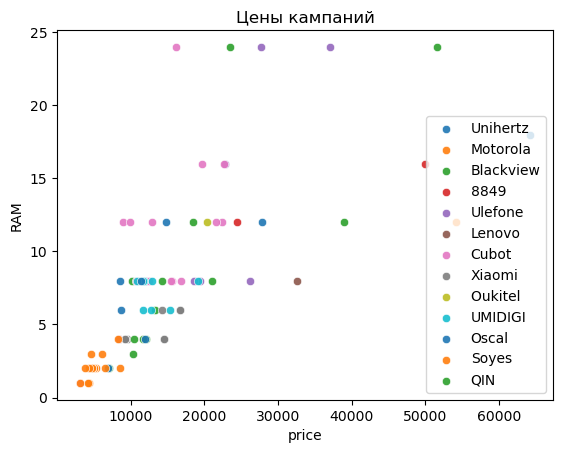

In [15]:
show_difference_in_RAM_with_companies(df)

In [16]:
#Функция для перебора продуктов по диагоналям, ценам и кампаниям
def show_difference_in_diag_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с Диагональю различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='diag', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с Диагональю различных характеристик:
Телефон Unihertz: количество отзывов 2
Количество Телефонов с Диагональю различных характеристик:
Телефон Motorola: количество отзывов 2
Количество Телефонов с Диагональю различных характеристик:
Телефон Blackview: количество отзывов 14
Количество Телефонов с Диагональю различных характеристик:
Телефон 8849: количество отзывов 2
Количество Телефонов с Диагональю различных характеристик:
Телефон Ulefone: количество отзывов 7
Количество Телефонов с Диагональю различных характеристик:
Телефон Lenovo: количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон Cubot: количество отзывов 15
Количество Телефонов с Диагональю различных характеристик:
Телефон Xiaomi: количество отзывов 10
Количество Телефонов с Диагональю различных характеристик:
Телефон Oukitel : количество отзывов 1
Количество Телефонов с Диагональю различных характеристик:
Телефон UMIDIGI: количество отзывов 8
Количество Телефонов с Диагон

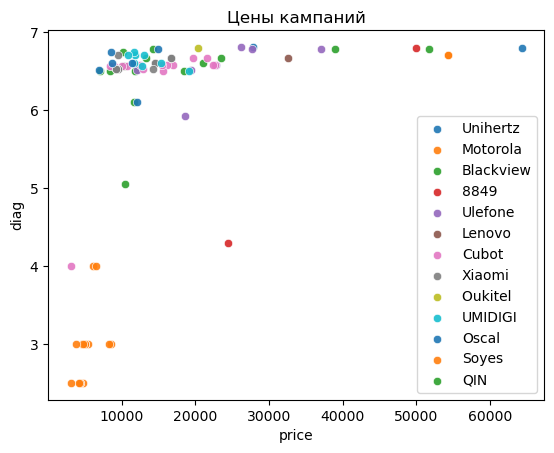

In [17]:
show_difference_in_diag_with_companies(df)

In [18]:
#Функция для перебора продуктов по ПЗУ, ценам и кампаниям
def show_difference_in_ROM_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с ПЗУ различных характеристик:")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='ROM', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с ПЗУ различных характеристик:
Телефон Unihertz: количество отзывов 2
Количество Телефонов с ПЗУ различных характеристик:
Телефон Motorola: количество отзывов 2
Количество Телефонов с ПЗУ различных характеристик:
Телефон Blackview: количество отзывов 14
Количество Телефонов с ПЗУ различных характеристик:
Телефон 8849: количество отзывов 2
Количество Телефонов с ПЗУ различных характеристик:
Телефон Ulefone: количество отзывов 7
Количество Телефонов с ПЗУ различных характеристик:
Телефон Lenovo: количество отзывов 1
Количество Телефонов с ПЗУ различных характеристик:
Телефон Cubot: количество отзывов 15
Количество Телефонов с ПЗУ различных характеристик:
Телефон Xiaomi: количество отзывов 10
Количество Телефонов с ПЗУ различных характеристик:
Телефон Oukitel : количество отзывов 1
Количество Телефонов с ПЗУ различных характеристик:
Телефон UMIDIGI: количество отзывов 8
Количество Телефонов с ПЗУ различных характеристик:
Телефон Oscal: количество отзывов 6
Количество 

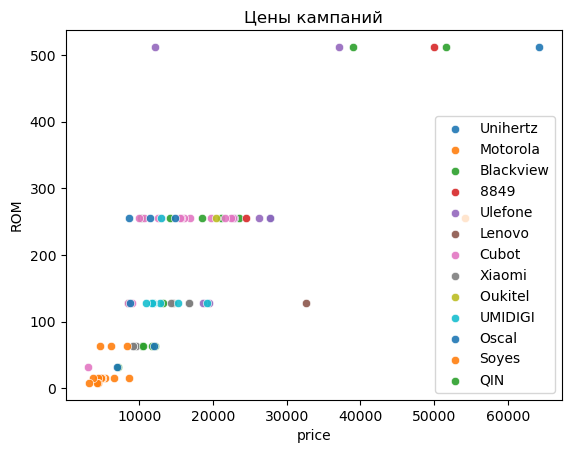

In [19]:
show_difference_in_ROM_with_companies(df)

In [20]:
#Функция для перебора продуктов по батареям, ценам и кампаниям
def show_difference_in_bat_with_companies(df):
    for n in companies:
        #Копирование датасета по кампаниям
        df_com = df[df["name"] == n]
        print("Количество Телефонов с Батареями различных характеристик")
        print("Телефон {}: количество отзывов {}".format(n,len(df_com[df_com["name"] == n]))),
        sns.scatterplot(df_com[(df_com["name"] == n)],y='bat', x="price",alpha=0.9,label=str(n)).set(title='Цены кампаний')
        plt.legend()
    plt.show()#Сделано для отображения всех графиков сразу, а не только одного

Количество Телефонов с Батареями различных характеристик
Телефон Unihertz: количество отзывов 2
Количество Телефонов с Батареями различных характеристик
Телефон Motorola: количество отзывов 2
Количество Телефонов с Батареями различных характеристик
Телефон Blackview: количество отзывов 14
Количество Телефонов с Батареями различных характеристик
Телефон 8849: количество отзывов 2
Количество Телефонов с Батареями различных характеристик
Телефон Ulefone: количество отзывов 7
Количество Телефонов с Батареями различных характеристик
Телефон Lenovo: количество отзывов 1
Количество Телефонов с Батареями различных характеристик
Телефон Cubot: количество отзывов 15
Количество Телефонов с Батареями различных характеристик
Телефон Xiaomi: количество отзывов 10
Количество Телефонов с Батареями различных характеристик
Телефон Oukitel : количество отзывов 1
Количество Телефонов с Батареями различных характеристик
Телефон UMIDIGI: количество отзывов 8
Количество Телефонов с Батареями различных характ

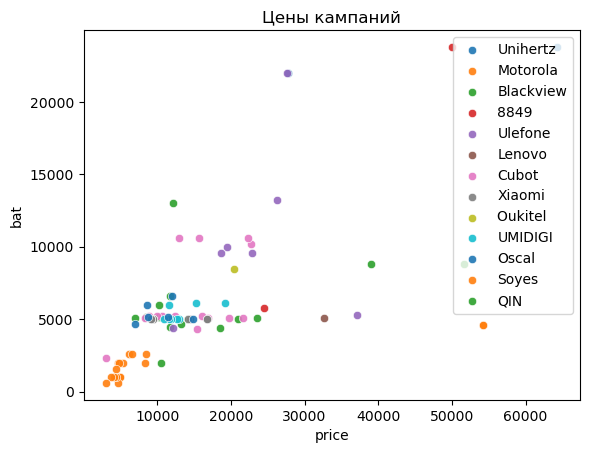

In [21]:
show_difference_in_bat_with_companies(df)

In [22]:
"""

Характеристики значительно сказываются на конечной цене, однако в ограниченном значении.
Большую играет роль реклама а так-же имя бренда.
Наибольшую разницу в ценах приносит именно батарея, ибо аккумуляторы с большим объемом -
- сказываются на стоимости телефона больше всего.

"""

'\n\nХарактеристики значительно сказываются на конечной цене, однако в ограниченном значении.\nБольшую играет роль реклама а так-же имя бренда.\nНаибольшую разницу в ценах приносит именно батарея, ибо аккумуляторы с большим объемом -\n- сказываются на стоимости телефона больше всего.\n\n'